# Pythonで作る2次元変位解析FEM
## 1.はじめに
### 1.1 Pythonとは
Pythonは、いわゆるLL(Lightweight Language)のひとつである。ここでのLightweightというのは、動作が軽量という意味ではなく、習得・学習・使用が容易(軽量)であるということから付けられている。Pythonはその学習のしやすさ、それに伴うユーザーの多さ、パッケージの豊富さから、近年のAIブームにおける使用言語のデファクトスタンダードとなっている。もしあなたが今Pythonを使ったことがなかったとしても、これを機にPythonを始めてみることをおすすめする。

### 1.2 有限要素法とは
有限要素法(FEM : Fenite Element Method)とは、解析したい物や場を細かい要素に区切り、その細かい要素について計算した結果を重ね合わせて全体を求める手法である。流れ場の解析や構造物の応力解析などに広く使われる手法である。本レポートでは、2次元の構造物を対象とした応力解析問題について有限要素法を用いる。

## 2.定式化
弾性体の支配方程式は、いわゆるフックの法則である以下の式で表される。
$$
F=KU
$$

この式は解析対象全体についての式だが、これを有限要素に分解(離散化)する。1要素についての支配方程式は以下である。
$$
F_e=K_eU_e
$$

ただし、各要素の剛性マトリクス$K_e$は
$$
K=\sum_e^{AllElements}K_e
$$

であり、$K_e$は以下のようになる。
$$
K_e=\iint_{\Omega_e} B^TDBdet(J)d\Omega_e
$$

一般に積分をプログラム上で行うことは困難であるから、数値積分によって計算し易い形式に近似する。数値積分法の1つであるガウス・ルジャンドル求積を適用して、
$$
K_e=\sum_{i=1}^4 \sum_{j=1}^4 \omega_i \omega_j B^T(\xi_{i,j},\eta_{i,j})DB(\xi_{i,j},\eta_{i,j})det(J(\xi_{i,j},\eta_{i,j}))
$$

$$
\omega_i=\omega_j=1 \;\;(i,j=1,2,3,4)
$$

$$
(\xi_{i,j},\eta_{i,j})=
(\pm \frac{1}{\sqrt 3},\pm \frac{1}{\sqrt 3}),
(\pm \frac{1}{\sqrt 3},\mp \frac{1}{\sqrt 3})
$$

となる。$(\xi_{i,j},\eta_{i,j})$はガウス・ルジャンドル求積の積分点の正規化座標での座標値である。

今、上式においての未知数は$B$、$D$、$J$である。それらの具体形を以下に示す。
ひずみ$\epsilon$は以下のように表される。
$$
\epsilon=\left( \begin{array}{} 
\epsilon_x \\
\epsilon_y \\
\gamma_{xy}
\end{array} \right)
=\left( \begin{array}{}
\frac{\partial u}{\partial x} \\
\frac{\partial v}{\partial y} \\
\frac{\partial v}{\partial x}+
\frac{\partial u}{\partial y}
\end{array} \right)
=\left( \begin{array}{}
\frac{\partial}{\partial y} & 0 \\
0 & \frac{\partial}{\partial x} \\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y}
\end{array} \right)
\left( \begin{array}{}
u \\
v
\end{array} \right)
=Au
$$

また$B$マトリクスは上記の$A$を用いて以下のように表される。

$$
B=\left( \begin{array}{}
B_1 & B_2 & B_3 & B_4 
\end{array} \right)
$$

$$
B_n=AN_n=\left( \begin{array}{}
\frac{\partial}{\partial y} & 0 \\
0 & \frac{\partial}{\partial x} \\
\frac{\partial}{\partial x} & \frac{\partial}{\partial y}
\end{array} \right)
\left( \begin{array}{}
N_n & 0 \\ 
0 & N_n
\end{array} \right)
=\left( \begin{array}{}
\frac{\partial N_n}{\partial y} & 0 \\
0 & \frac{\partial N_n}{\partial x} \\
\frac{\partial N_n}{\partial x} & \frac{\partial N_n}{\partial y}
\end{array} \right)
$$

$$
(n=1,2,3,4)
$$

ここで、$B_n$の成分は偏微分の連鎖則から以下のように表される。
$$
\frac{\partial N_n}{\partial \xi}=
\frac{\partial x}{\partial \xi} \frac{\partial N_n}{\partial x}+
\frac{\partial y}{\partial \xi} \frac{\partial N_n}{\partial y}
$$

$$
\frac{\partial N_n}{\partial \eta}=
\frac{\partial x}{\partial \eta} \frac{\partial N_n}{\partial x}+
\frac{\partial y}{\partial \eta} \frac{\partial N_n}{\partial y}
$$


以上の関係を行列形式で表せば、

$$
\left( \begin{array}{}
\frac{\partial N_n}{\partial \xi} \\ 
\frac{\partial N_n}{\partial \eta} 
\end{array} \right)=
\left( \begin{array}{}
\frac{\partial x}{\partial \xi} & \frac{\partial y}{\partial \xi} \\ 
\frac{\partial x}{\partial \eta} & \frac{\partial y}{\partial \eta}
\end{array} \right)
\left( \begin{array}{}
\frac{\partial N_n}{\partial \xi} \\ 
\frac{\partial N_n}{\partial \eta} 
\end{array} \right)=
J
\left( \begin{array}{}
\frac{\partial N_n}{\partial \xi} \\ 
\frac{\partial N_n}{\partial \eta} 
\end{array} \right)
$$

となる。ここで$J$はヤコビマトリクスである。

$$
x = \sum_{n=1}^4 N_n x_n ,\;\;
y = \sum_{n=1}^4 N_n y_n
$$

$$
\frac{\partial x}{\partial \xi} = \sum_{n=1}^4 \frac{\partial N_n}{\partial \xi} x_n
,\;\;
\frac{\partial x}{\partial \eta} = \sum_{n=1}^4 \frac{\partial N_n}{\partial \eta} x_n
$$

$$
\frac{\partial y}{\partial \xi} = \sum_{n=1}^4 \frac{\partial N_n}{\partial \xi} y_n
,\;\;
\frac{\partial y}{\partial \eta} = \sum_{n=1}^4 \frac{\partial N_n}{\partial \eta} y_n
$$

$$
J=
\left( \begin{array}{}
\frac{\partial N_1}{\partial \xi} & 
\frac{\partial N_2}{\partial \xi} &
\frac{\partial N_3}{\partial \xi} &
\frac{\partial N_4}{\partial \xi} \\ 
\frac{\partial N_1}{\partial \eta} &
\frac{\partial N_2}{\partial \eta} &
\frac{\partial N_3}{\partial \eta} &
\frac{\partial N_4}{\partial \eta} 
\end{array} \right)
\left( \begin{array}{}
x_1 & y_1 \\ 
x_2 & y_2 \\ 
x_3 & y_3 \\ 
x_4 & y_4 
\end{array} \right)
$$

$$
\left( \begin{array}{}
N_1 \\ 
N_2 \\ 
N_3 \\ 
N_4 
\end{array} \right)=
\frac{1}{4}
\left( \begin{array}{}
(1-\xi)(1-\eta) \\ 
(1+\xi)(1-\eta) \\
(1+\xi)(1+\eta) \\
(1-\xi)(1+\eta) \\
\end{array} \right)
$$

<img src="https://latex.codecogs.com/gif.latex?\ \frac{\partial N_1}{\partial \xi}=-\frac{1-\eta}{4} ,\;\;\frac{\partial N_2}{\partial \xi}=\frac{1-\eta}{4} ,\;\;" />

$$
\frac{\partial N_1}{\partial \xi}=-\frac{1-\eta}{4} ,\;\;
\frac{\partial N_2}{\partial \xi}=\frac{1-\eta}{4} ,\;\;
\frac{\partial N_3}{\partial \xi}=\frac{1+\eta}{4} ,\;\;
\frac{\partial N_4}{\partial \xi}=-\frac{1+\eta}{4}
$$

$$
\frac{\partial N_1}{\partial \eta}=-\frac{1-\xi}{4} ,\;\;
\frac{\partial N_2}{\partial \eta}=-\frac{1+\xi}{4} ,\;\;
\frac{\partial N_3}{\partial \eta}=\frac{1+\xi}{4} ,\;\;
\frac{\partial N_4}{\partial \eta}=\frac{1-\xi}{4}
$$

$D$マトリクスは以下である。これは平面応力状態を仮定した際の式である。平面応力状態は薄い平板が面方向に荷重を受ける状態であり、板に垂直方向($z$方向)の応力を0とみなす仮定である。

$$
D=\frac{E}{1-\nu^2}
\left( \begin{array}{}
1 & \nu & 0\\ 
\nu & 1 & 0 \\
0 & 0 & \frac{1-\nu}{2} 
\end{array} \right)
$$

$E$はヤング率、$\nu$はポアソン比である。
参考として、平面ひずみ状態での$D$マトリクスを以下に示す。平面ひずみ状態では、$z$方向を非常に長いと仮定して$z$方向のひずみを0とみなす。

$$
D=\frac{E}{(1+\nu)(1-2\nu)}
\left( \begin{array}{}
1-\nu & \nu & 0\\ 
\nu & 1-\nu & 0 \\
0 & 0 & \frac{1-2\nu}{2} 
\end{array} \right)
$$

## 3.実装
### 概要
本プログラムはトポロジー最適化という設計最適化手法のためのFEMとして設計した関係から、拘束条件や荷重条件、解析領域が変化せず、各要素のヤング率だけが変化するような繰り返しの解析がしやすくなっている。
FEMをクラスとして実装し、コンストラクタに荷重条件などの変化しない値を渡し、そのインスタンスの持つ計算メソッドに変化するヤング率(実際には無次元密度)を渡してループさせて最適化を行なう。

まずはFEMクラスを用意し、計算に必要かつ繰返しの過程で変化しない条件を受け入れるコンストラクタを定義する。またそれを実際に使用する際の大まかな枠組みを書いておく。

In [1]:
class FEM:
    def __init__(self, nx, ny, mesh_size, fix_nodes, F):
        self.nx = nx
        self.ny = ny
        self.mesh_size = mesh_size
        self.fix_nodes = fix_nodes
        self.F = F
    
    def fem(self):
        U=[]
        return U

def main():
    nx = 50
    ny = 50
    mesh_size = 1
    
    fix_nodes = []
    F = []
    
    fem_obj = FEM(nx, ny, mesh_size, fix_nodes, F)
    U = fem_obj.fem()
    
if __name__ == "__main__":
    main()

ここからは前出の定式化に登場した計算をFEMクラスのfemメソッドに追加していく。$K$マトリクスやその算出に必要なマトリクスはFEMクラスの内部メソッドとして実装して計算の見通しを良くする。
nx、nyはそれぞれx、y方向の要素数、mesh_sizeは要素(正方形)の1辺、fix_nodesは固定するノードの指定、Fは力のかかるノードと方向・大きさを指定する。

In [ ]:
class FEM:
    # - - 略 - - #
    
    def fem(self):
        K = self._Kmat()

        K_free = K[self.free_nodes].T[self.free_nodes].T
        U = np.zeros(self.all_vector_count)
        U[self.free_nodes] = np.linalg.solve(K_free, self.F[self.free_nodes])
        U=[]
        return U

100%|██████████████████████████████████████████| 30/30 [00:00<00:00, 84.85it/s]


U: [ 0.          0.          0.         ... -0.96666667  3.
 -1.        ]
elapse time [sec]: 0.48966193199157715


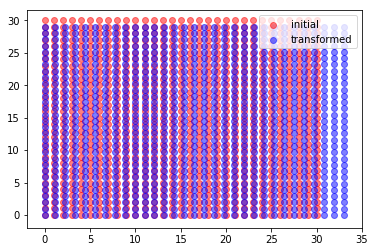

In [8]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

class FEM:
    def __init__(self, nx, ny, mesh_size, fix_nodes, F):
        self.nx = nx
        self.ny = ny
        self.mesh_size = mesh_size
        self.fix_nodes = fix_nodes
        self.F = F

        self.E0 = 100
        self.Emin = 1e-3

        self.all_element_count = nx*ny
        self.all_node_count = (nx+1)*(ny+1)
        self.all_vector_count = 2*(nx+1)*(ny+1)

        self.free_nodes = np.setdiff1d(
            np.arange(self.all_vector_count), fix_nodes)

        self.node_coordinate_values = np.array(
            [[x, y] for x in range(nx+1) for y in range(ny+1)])*mesh_size

        # start from 1
        # [[elem1node1,elem1node2,elem1node3,elem1node4],
        #  [elem2node1,elem2node2,elem2node3,elem2node4],...]
        '''
        node numbers for each elements
        4 --- 3
        |     |
        |     |
        1 --- 2
        '''
        self.point = np.array([[-3 ** (-0.5), -3 ** (-0.5)],
                               [3 ** (-0.5),  -3 ** (-0.5)],
                               [3 ** (-0.5),  3 ** (-0.5)],
                               [-3 ** (-0.5),  3 ** (-0.5)]])
        self.weight = np.array([1, 1, 1, 1])
        # 本来は重みは2つ必要

        nu = 1/3
        # nu: poisson ratio
        # 平面応力状態
        self._Cmat = np.array([[1, nu, 0],
                               [nu, 1, 0],
                               [0, 0, (1-nu)/2]]) / (1-nu ** 2)
        # Dmat=E*Cmat

    # fenite element method
    def fem(self):
        K = self._Kmat()

        K_free = K[self.free_nodes].T[self.free_nodes].T
        U = np.zeros(self.all_vector_count)
        U[self.free_nodes] = np.linalg.solve(K_free, self.F[self.free_nodes])

        self.U = U
        return U

    # stiffness matrix
    def _Kmat(self):
        K = np.zeros([self.all_vector_count, self.all_vector_count])
        for y in tqdm(range(self.ny)):
            for x in range(self.nx):
                Ke = self._Kemat(x, y)
                top1 = (self.ny+1)*x+y
                top2 = (self.ny+1)*(x+1)+y
                elem = [2*top1, 2*top1+1, 2*top2, 2*top2+1,
                        2*top2+2, 2*top2+3, 2*top1+2, 2*top1+3]
                for index, one_elem in enumerate(elem):
                    K[elem, one_elem] += Ke[index]

        return K

    # stiffness matrix of one element
    def _Kemat(self, x, y):
        Ke = np.zeros((8, 8))
        D = self.E0*self._Cmat

        for n in range(4):
            xi, eta = self.point[n]
            w = self.weight[n]
            dNdxi = self._dNdxi(eta)
            dNdeta = self._dNdeta(xi)
            J = self._Jmat(x, y, dNdxi, dNdeta)
            B = self._Bmat(J, dNdxi, dNdeta)
            Ke += w*(B.T @ D) @ B*np.linalg.det(J)
        return Ke

    def _Jmat(self, x, y, dNdxi, dNdeta):
        '''
        node numbers for each elements
        4 --- 3
        |     |
        |     |
        1 --- 2
        '''
        #x1=self.node_coordinate_values
        x_nodes = np.array([x, x+1, x+1, x])
        y_nodes = np.array([y, y, y+1, y+1])

        # TODO use coordinate_value

        J = np.stack([dNdxi, dNdeta]) @ (
            np.stack([x_nodes, y_nodes])*self.mesh_size).T
        return J

    # partial derivative of shape function (N) with respect to xi
    def _dNdxi(self, eta):
        return np.array([-0.25*(1-eta), 0.25*(1-eta), 0.25*(1+eta), -0.25*(1+eta)])

    # partial derivative of shape function (N) with respect to eta
    def _dNdeta(self, xi):
        return np.array([-0.25*(1-xi), -0.25*(1+xi), 0.25*(1+xi), 0.25*(1-xi)])

    def _Bmat(self, J, dNdxi, dNdeta):
        B = np.zeros([3, 8])

        dNdx_dNdy = np.linalg.inv(J) @ np.stack([dNdxi, dNdeta])
        for i in range(4):
            dNidx = dNdx_dNdy[0][i]
            dNidy = dNdx_dNdy[1][i]

            B[0][2*i] = dNidx
            B[1][2*i+1] = dNidy
            B[2][2*i] = dNidy
            B[2][2*i+1] = dNidx
        return B
    
    def show_plot(self):
        x_list = [row[0] for row in self.node_coordinate_values]
        y_list = [row[1] for row in self.node_coordinate_values]

        plt.scatter(x_list, y_list, c="r", alpha=0.5, label="initial")
        plt.scatter(x_list+self.U[::2], y_list +
                    self.U[1::2], c="b", alpha=0.5, label="transformed")
        plt.legend()
    
def main():
    start_time = time.time()
    nx = 30
    ny = 30
    mesh_size = 1

    uniformly_distributed_F=10

    Fx = np.zeros((nx+1)*(ny+1))
    Fy = np.zeros((nx+1)*(ny+1))

    fix_x = list(range(ny+1))
    fix_y = [i for i in range(0, (nx+1)*(ny+1), ny+1)]
    
    Fx[-(ny+1):] = uniformly_distributed_F
    Fx[-(ny+1)] *= 0.5
    Fx[-1] *= 0.5

    fix_x = np.array(fix_x)
    fix_y = np.array(fix_y)
    fix_nodes = np.r_[2*fix_x, 2*fix_y+1]

    F = np.array([[x, y] for x, y in zip(Fx, Fy)]).flatten()

    fem_obj = FEM(nx, ny, mesh_size, fix_nodes, F)
    U = fem_obj.fem()

    print("U:", U)
    print("elapse time [sec]:", time.time()-start_time)
    
    fem_obj.show_plot()

if __name__ == "__main__":
    main()